## Modelo a implementar: Kmeans
Archivo fuente: usuarios twitter.csv
Objetivo: agrupar usuarios por sus rasgos de personalidad
Variable de entrada: crea tu modelo seleccionando solo 3 características
- usuario: nombre en Twitter
- "op": Openness to experience — grado de apertura mental a nuevas experiencias, curiosidad, arte
- "co": Conscientiousness — grado de orden, prolijidad, organización
- "ex": Extraversion — grado de timidez, solitario o participación ante el grupo social
- "ag": Agreeableness — grado de empatía con los demás, temperamento
- "ne": Neuroticism, — grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcoun: Cantidad promedio de palabras usadas en sus tweets

Variable de salida: Categoría — Actividad laboral del usuario (1. Actor/actriz, 2. Cantante, 3. Modelo, 4. Tv, series, 5. Radio, 6. Tecnología, 7. Deportes, 8. Politica y 9. Escritor)
¿Cuál es el número adecuado de cluster?
¿Qué interpretación le dan a los grupos que se han formado?

## Modelo a implementar: RNA. Deben realizar una búsqueda de hiperparámetros mediante
GridSearchCV or RandomizedSearchCV. Utilicen 5 K-Fold validación cruzada.
Datos: Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya
separación no es perfecta.
from sklearn.datasets import make_blobs


```X, y = make_blobs(
n_samples = 500,
n features = 2,
centers = 3,
cluster std = 1.2,
shuffle = True,
random state = 0)
```

Objetivo: clasificar a qué grupo pertenece cada muestra
¿Cuál es la configuración de la RNA que te generó mejor accuracy?

Mejores hiperparámetros para RNA encontrados: {'activation': 'relu', 'hidden_layer_sizes': (5, 5), 'max_iter': 10000, 'random_state': 0, 'solver': 'sgd'}
Precisión (accuracy) con los mejores hiperparámetros para RNA: 0.8780000000000001
Mejor modelo para RNA:
MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10000, random_state=0,
              solver='sgd')

Explicación para RNA:
El mejor modelo para la RNA se eligió según la precisión (accuracy) obtenida en la validación cruzada.
Los mejores hiperparámetros encontrados para la RNA son los siguientes:
activation: relu
hidden_layer_sizes: (5, 5)
max_iter: 10000
random_state: 0
solver: sgd
La precisión obtenida con estos hiperparámetros para la RNA es: 0.8780000000000001


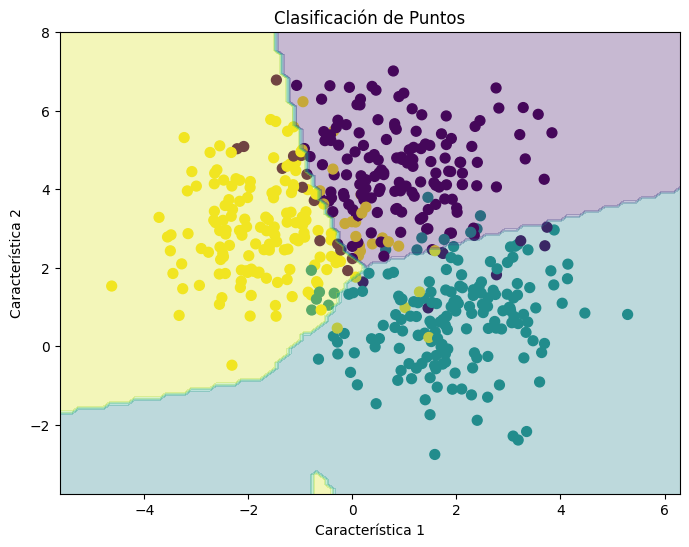

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Genera los datos
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0,
)

# Define el espacio de búsqueda de hiperparámetros para la RNA
param_grid = {
    "hidden_layer_sizes": [(5, 5), (10, 10), (15, 15), (20, 20), (50, 50)],
    "activation": ["relu", "logistic"],
    "solver": ["adam", "sgd", "lbfgs"],
    "max_iter": [1000, 10000],
    "random_state": [0, 1],
}

# Crea el modelo de RNA
mlp = MLPClassifier()

# Utiliza GridSearchCV para encontrar la mejor configuración de hiperparámetros para la RNA
grid_search_rna = GridSearchCV(mlp, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rna.fit(X, y)

# Obtiene los resultados de todas las iteraciones en un DataFrame para la RNA
results_df_rna = pd.DataFrame(grid_search_rna.cv_results_).iloc[:, 4:]

# Muestra la mejor configuración de hiperparámetros encontrada para la RNA
best_params_rna = grid_search_rna.best_params_
best_accuracy_rna = grid_search_rna.best_score_
print("Mejores hiperparámetros para RNA encontrados:", best_params_rna)
print("Precisión (accuracy) con los mejores hiperparámetros para RNA:", best_accuracy_rna)

# Imprime el mejor modelo para la RNA
best_model_rna = grid_search_rna.best_estimator_
print("Mejor modelo para RNA:")
print(best_model_rna)

# Imprime una explicación para la RNA
print("\nExplicación para RNA:")
print("El mejor modelo para la RNA se eligió según la precisión (accuracy) obtenida en la validación cruzada, debido su alto puntaje y simplicidad.")
print("Los mejores hiperparámetros encontrados para la RNA son los siguientes:")
for param, value in best_params_rna.items():
    print(f"{param}: {value}")
print("La precisión obtenida con estos hiperparámetros para la RNA es:", best_accuracy_rna)

# Grafica los puntos con sus clases
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", marker="o", s=50)
plt.title("Clasificación de Puntos")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Crea una malla de puntos para visualizar las fronteras de decisión
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100),
)
Z = best_model_rna.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibuja las fronteras de decisión para la RNA
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.show()

In [30]:
results_df_rna

,param_activation,param_hidden_layer_sizes,param_max_iter,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_hidden_layer_sizes_0
0,relu,"(5, 5)",1000,0,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.85,0.86,0.92,0.86,0.84,0.866,0.028000,52,5
1,relu,"(5, 5)",1000,0,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.85,0.85,0.90,0.89,0.84,0.866,0.024166,52,5
2,relu,"(5, 5)",1000,0,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.88,0.86,0.90,0.85,0.82,0.862,0.027129,65,5
3,relu,"(5, 5)",1000,1,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.88,0.87,0.94,0.86,0.82,0.874,0.038781,13,5
4,relu,"(5, 5)",1000,1,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.87,0.86,0.89,0.88,0.82,0.864,0.024166,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,logistic,"(50, 50)",10000,0,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.86,0.88,0.92,0.88,0.75,0.858,0.057411,70,50
116,logistic,"(50, 50)",10000,0,lbfgs,"{'activation': 'logistic', 'hidden_layer_sizes...",0.87,0.82,0.85,0.86,0.80,0.840,0.026077,91,50
117,logistic,"(50, 50)",10000,1,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.89,0.89,0.93,0.85,0.82,0.876,0.037736,9,50
118,logistic,"(50, 50)",10000,1,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.86,0.87,0.93,0.88,0.85,0.878,0.027857,2,50
